# Calculé sur la base

In [1]:
#!pip install influxdb
import numpy as np
import math
import matplotlib.pyplot as plt
from influxdb import InfluxDBClient

Rechercher selon le temps prédéterminé. Format du temps(YYYY-MM-DD HH:MM:SS.mmm. où mmm est le milliseconds)

In [2]:
stime='2017-01-27 08:00:00.000'
ftime='2017-01-27 17:30:00.000'

In [3]:
client = InfluxDBClient('apolline.lille.inria.fr', '8086', 'Apolline', 'PC2A', 'apolline')
results = client.query('select * from "events.stats.rasp8" where time >\'%s\' and time <\'%s\';'%(stime,ftime))
points = list(results.get_points())

L'extraction du teneur de CO2

In [4]:
x=[]
y=[]
def readData():
    for i in range(len(points)):
        x.append(i)
        y.append(points[i]['CO2'])
    return x,y

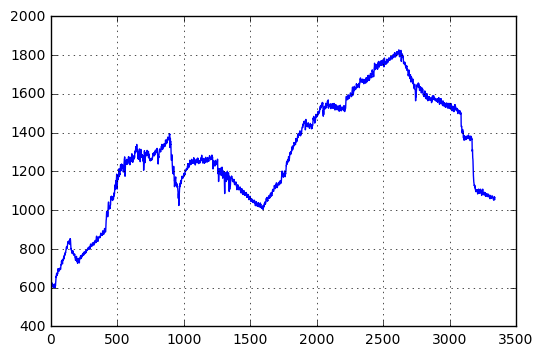

In [5]:
x,y=readData()
plt.plot(x,y,'-',label='original values')
plt.grid()
plt.show()

Obtenez la valeur moyen du une Période de temps

In [6]:
n,t=0,0
for point in points:
    n+=1
    t+=point['CO2']    
avg=float(t/n)
print("the avg temperature is %f"%(avg))

the avg temperature is 1293.776235


Calculer la fluctuation du une Période de temps

In [9]:
dev=0
for point in points:
    dev=math.pow((point['CO2']-avg),2)
stdevp=float(dev/n)
print("the fluctuation(variance) of temperature is %f"%(stdevp))

the fluctuation(variance) of temperature is 16.950820


Obtenez la maximale valeur du une Période de temps

In [10]:
maxstime='2017-01-27 08:00:00.000'
maxftime='2017-01-27 17:30:00.000'

In [11]:
resultMax = client.query('SELECT max(CO2) FROM "events.stats.rasp8" where time >\'%s\' and time <\'%s\';'%(maxstime,maxftime))
resultMax=list(resultMax.get_points())
print("the max CO2 is %d at %s"%(resultMax[0]['max'],resultMax[0]['time']))

the max CO2 is 1827 at 2017-01-27T15:26:43.082587588Z


Obtenez la minimale valeur du une Période de temps

In [12]:
minstime='2017-01-27 08:00:00.000'
minftime='2017-01-27 17:30:00.000'

In [13]:
resultMin = client.query('SELECT min(CO2) FROM "events.stats.rasp8" where time >\'%s\' and time <\'%s\';'%(minstime,minftime))
resultMin=list(resultMin.get_points())
print("the min CO2 is %d at %s"%(resultMin[0]['min'],resultMin[0]['time']))

the min CO2 is 599 at 2017-01-27T08:05:17.930156323Z
